# Mid term ML destroyer 

#### Vol : 1 ; pub : 27:sep:22 00:02 

#### src ML lab exercise
#### also CS for DSAI
- Content
    - Basic import [here](#import-basic-thing)
    - Data gen [hrer](#generate-data-by-random-normal)
    - basic plot[here](#basic-plot)
    - Logistic binary
    - Newton logis
    - Multinom logis
    - L regression
        - Grad
        - normal Eq
    - NL reg
    -neve bay
    - SVM
    

# Implementer Ati 


In [5]:
# from werkzeug.security import generate_password_hash
#generate_password_hash(TODO, method='pbkdf2:sha256', salt_length=8)

In [13]:
NAME  = 'Ati tesakulsiri'
Hashval = 'pbkdf2:sha256:260000$DV0hNwsv$8650f9a86d6dbe87fac307f7f8b3a95a1297064a94d6227cb0a08f942b1b753c'


# IMport basic thing
<!-- <a name = 'imp'>a</a> -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Generate data by random normal


### Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

In [2]:
def generate_data(mu1, Sigma1, mu2, Sigma2):
    '''
    Use to generate  2 set of data merge to each other 
    we can use this data for Binary classification Problems.
    how separate of each data are depend on Delta(mu)
    and how data are 
    Sigma -> tell how data in clustur difference
    mu -> locate the location of the clustur
    '''
    X1 = np.random.multivariate_normal(mu1, Sigma, 200)
    y1 = np.zeros((200,1))
    X2 = np.random.multivariate_normal(mu2, Sigma, 200)
    y2 = np.ones((200,1))
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((y1, y2), 0)
    return X,y

def partition(X,y,percent=.8):
    idx = np.arange(0, y.shape[0])
    np.random.shuffle(idx)
    stp =int(percent * y.shape[0])
    train_idx = idx[:stp]
    test_idx = idx[stp:]
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx,:]
    y_test = y[test_idx,:]
    return X_train, X_test, y_train, y_test

In [3]:
mu1 = [3, 3]
Sigma = [[4, 0], [0, 4]]
mu2 = [5, 5]
X,y = generate_data(mu1, Sigma, mu2, Sigma)
X_train, X_test, y_train, y_test = partition(X,y)

In [4]:
X_train.shape,y_train.shape

((320, 2), (320, 1))

### HOW to add dounut shape on top of that two-dimensional spherical

In [5]:
def donut_generator(X,mu,sigma):
    angle = np.random.uniform(low=0.0, high=2*np.pi, size=(X.shape[0],))
    d = np.random.normal(mu**2,sigma**-1, (400,))
    Outer_f = X.copy()
    Outer_f[:,0] += d * d*np.cos(angle)
    Outer_f[:,1] += d * d*np.sin(angle)
    return Outer_f
    

### Non linear class data gen


In [12]:
x11 = np.random.uniform(-3,3,[100,1])
'''Change values'''
x12 = x11 * x11 + 2 + np.random.normal(0, 1, [100, 1])
X1 = np.concatenate((np.ones((100,1)), x11, x12), 1)

x21 = np.random.uniform(-3,3,[100,1])
x22 = x21 * x21 + 5 + np.random.normal(0, 1, [100, 1])
X2 = np.concatenate((np.ones((100,1)), x21, x22), 1)

X_comb = np.concatenate((X1, X2), 0)
y_for_this = np.concatenate((np.zeros((X1.shape[0],1)), np.ones((X2.shape[0],1))), 0)
print(X_comb.shape,y_for_this.shape)


(200, 3) (200, 1)


------------------------------------------------------------------------------------------------

## Basic plot

## Plot X,X with color of y

In [6]:
def plot_x_y_color(X,y):
    # plt.figure(dpi = 200)
    plt.scatter(X[:,1][(y==0).flat],X[:,0][(y==0).flat],alpha = 0.5)
    plt.scatter(X[:,1][(y==1).flat],X[:,0][(y==1).flat],c = 'coral',alpha = 0.5)


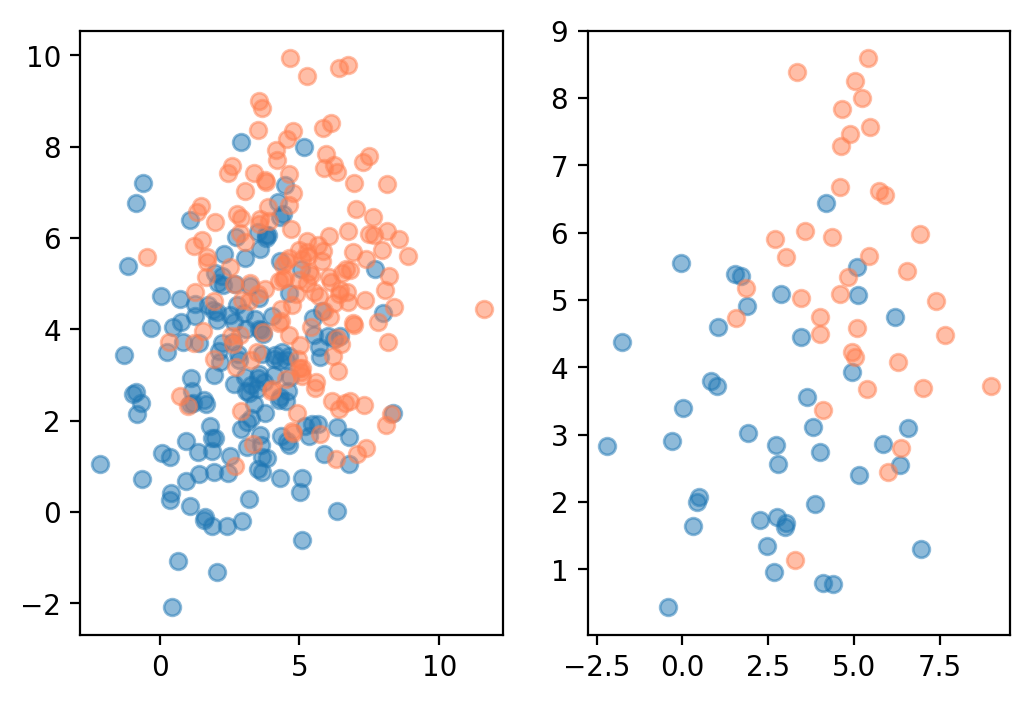

In [7]:
plt.figure(dpi=200)
plt.subplot(1,2,1)
plot_x_y_color(X_train,y_train)
plt.subplot(1,2,2)
plot_x_y_color(X_test,y_test)


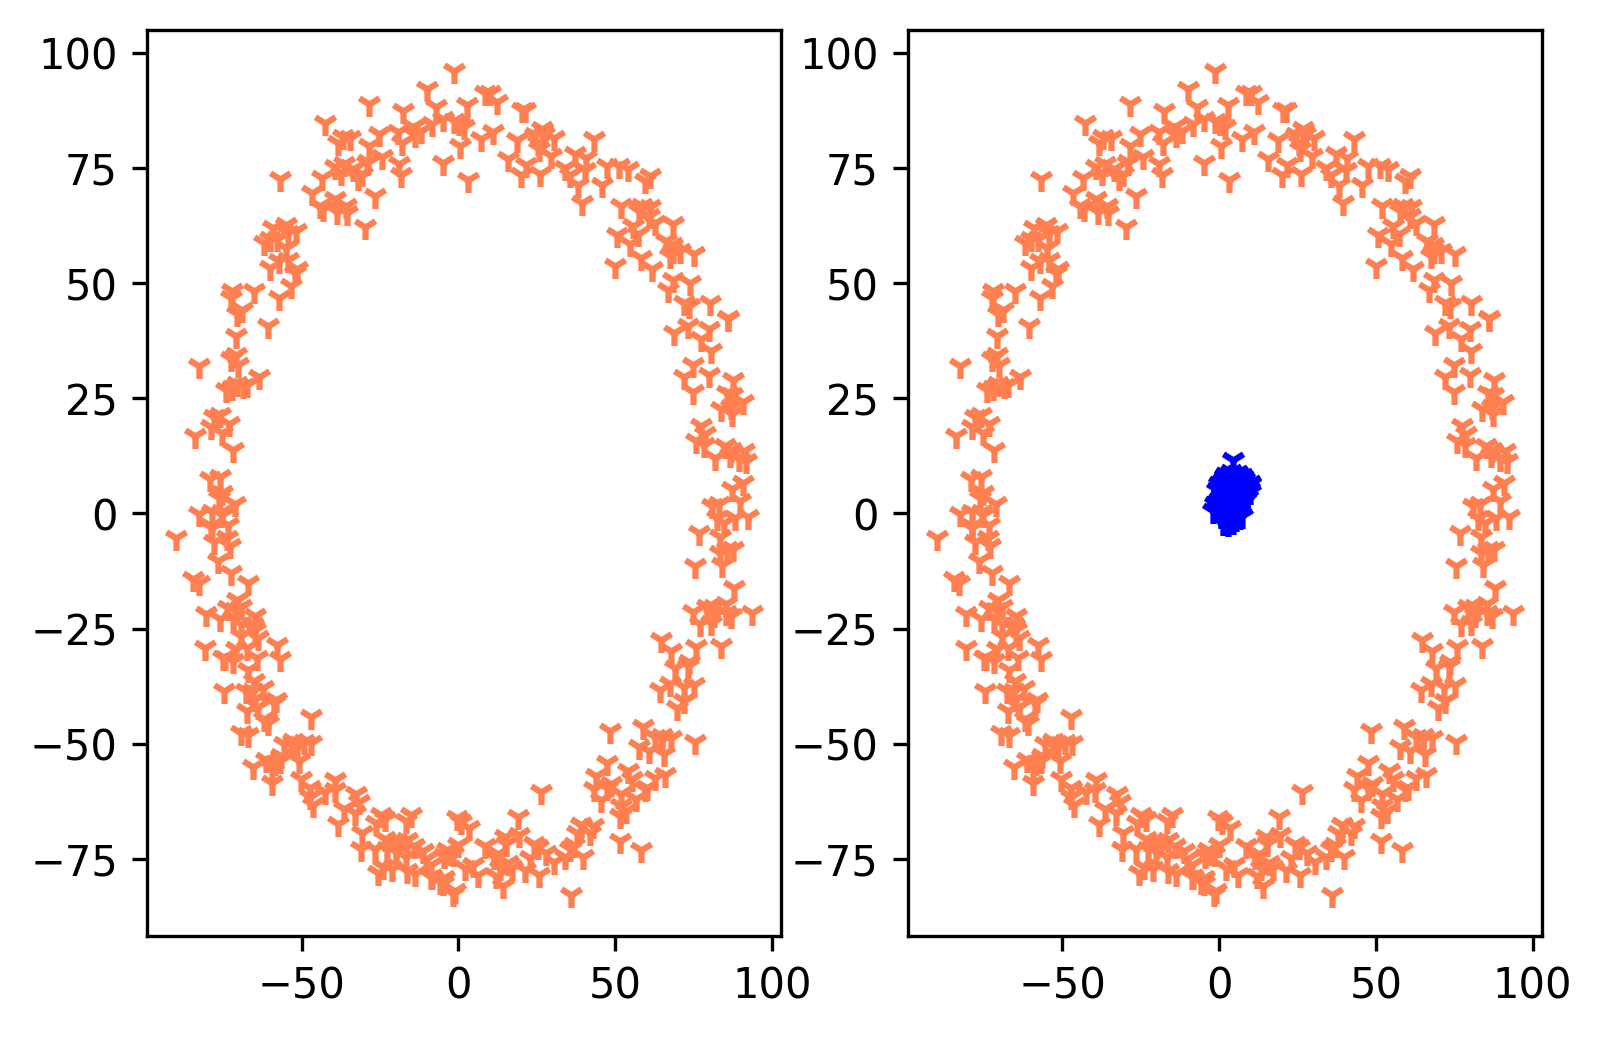

In [8]:
dnt = donut_generator(X,3,4)
plt.figure(dpi = 300)
plt.subplot(1,2,1)
plt.scatter(dnt[:,0],dnt[:,1], marker='1',c = 'coral')
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1], marker='1',c = 'blue')
plt.scatter(dnt[:,0],dnt[:,1], marker='1',c = 'coral')

## Non linear Classification data gen & plot

X1. Generate 100 data points for class 1 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 2$ and standard deviation 1.0.

X2. Generate 100 data points for class 2 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 5$ and standard deviation 1.0.

(200, 3) (200, 1)


Text(0.5, 1.0, 'Classification dataset')

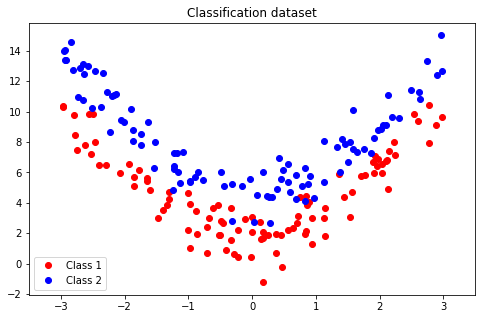

In [9]:
x11 = np.random.uniform(-3,3,[100,1])
'''Change values'''
x12 = x11 * x11 + 2 + np.random.normal(0, 1, [100, 1])
X1 = np.concatenate((np.ones((100,1)), x11, x12), 1)

x21 = np.random.uniform(-3,3,[100,1])
x22 = x21 * x21 + 5 + np.random.normal(0, 1, [100, 1])
X2 = np.concatenate((np.ones((100,1)), x21, x22), 1)

X_comb = np.concatenate((X1, X2), 0)
y_for_this = np.concatenate((np.zeros((X1.shape[0],1)), np.ones((X2.shape[0],1))), 0)
print(X_comb.shape,y_for_this.shape)

plt.figure(figsize=(8, 5))
plt.plot(X1[:,1], X1[:,2], 'ro', label='Class 1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='Class 2')
plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Classification dataset')

## add intercept

In [10]:
def normalized(data):
    return (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

def add_intercept(X):
    return np.concatenate((np.ones((X.shape[0],1)), X), 1)

In [11]:
test_add = add_intercept(X_test)
test_add[:5],test_add.shape

(array([[1.        , 0.78598629, 4.38105738],
        [1.        , 1.6437512 , 0.30847184],
        [1.        , 5.08681343, 2.8760053 ],
        [1.        , 3.68481698, 7.01186212],
        [1.        , 8.59321594, 5.39284666]]),
 (80, 3))

## END DATA GENERATE

-----------------------------------------------------------------------------------------------------------------------------------------------

## LOGIStic binary regression

In [12]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

def zo_predict(y):
    return (y > 0.5).astype(int)

acc_cal = lambda y,y_hat : (y_hat == y).astype(int).sum()/y.shape[0]


In [13]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None

        s = 1 / (1 + np.exp(-1 *z))
        return s

    def softmax(self, z):

        sigm =np.exp(z)/(np.sum(np.exp(z)))
        return sigm

    def h(self,X, theta):
        hf = None
        hf = self.sigmoid(X @ theta)
        return hf
    
    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        grad = -X.T @ (y - y_pred) / X.shape[0]
        # raise NotImplementedError()
        return grad
        
    def costFunc(self, theta, X, y):
        y_pred = self.h(X, theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = sum(error) / X.shape[0]
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta, X, y)
            # 2. update new theta
            theta = theta - alpha*grad
            # YOUR CODE HERE
            # raise NotImplementedError()
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]

        y_train_pred_soft = self.h(X, theta)
        y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)
        labels = [i for i in y_train_pred_hard[:,0]]
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        # raise NotImplementedError()
        y_pred_soft = self.h(X, theta)
        y_pred_hard = (y_pred_soft > 0.5).astype(int)
        percent_correct = (y_pred_hard == y).astype(int).sum() / y.shape[0]
        return percent_correct*100
        

# TOUSE
# alpha = 0.001
# iterations = 50000

# BGD_model = Logistic_BGD()
# initial_theta = np.zeros((3,1))
# bgd_theta, bgd_cost = BGD_model.gradientAscent('''TOADD''')


In [15]:
X_train_aug = add_intercept(X_train)
X_train_aug.shape

(320, 3)

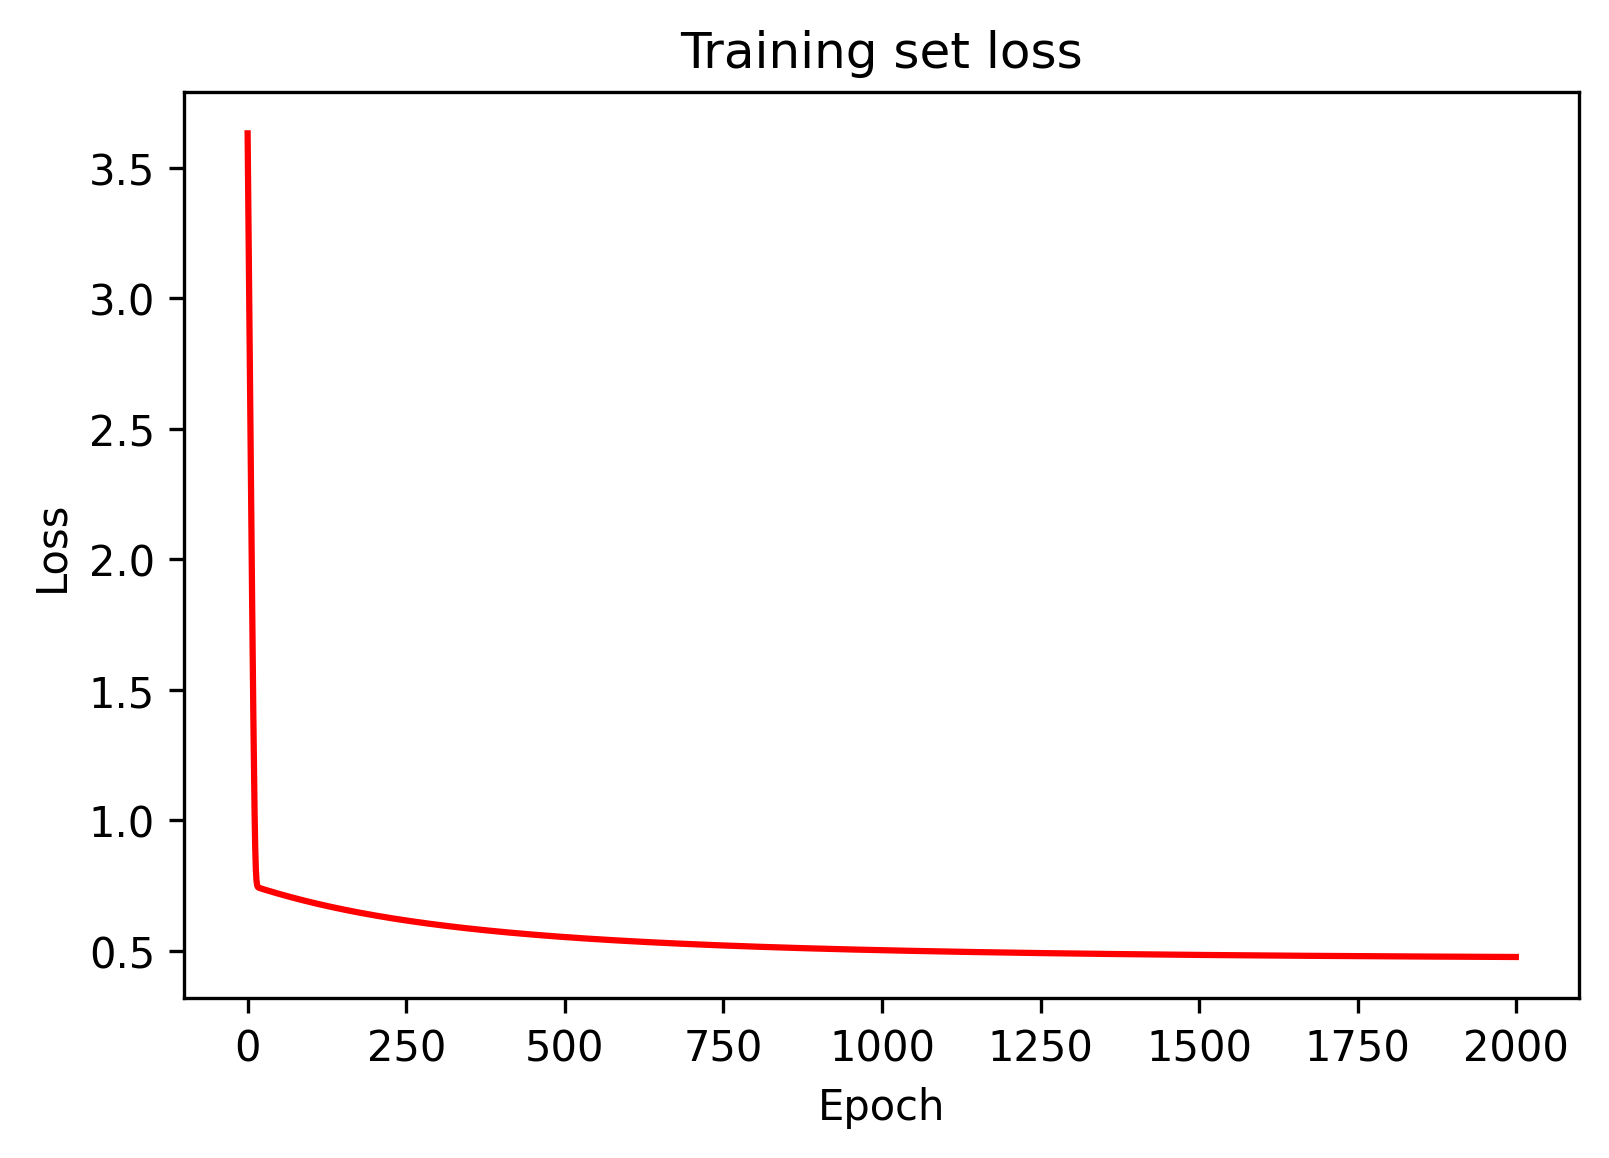

In [15]:
X_train_aug = add_intercept(X_train)
theta_initial = np.ones((X_train_aug.shape[1],1))
theta_final, j_history = train(X_train_aug, y_train, theta_initial, 0.05, 2000)
plt.figure(dpi=300
)
plt.plot(j_history, 'r-')
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Boundary_points

In [16]:
def boundary_points(X, theta):
    '''
    X using here Is not the one with Intercept no add np.ones
    So X.shape[1] == theta.shape[0] - 1
    '''
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

def plot_x_y_color_bl(X,y,y_hat,point_1, point_2):

    plt.subplot(1,2,1)
    plt.title('Correct predicted graph')
    describer = f'Acc : {acc_cal(y,y_hat)} '
    plt.scatter(X[:,1][np.logical_and(y==0,y == y_hat).flat],X[:,0][np.logical_and(y==0, y == y_hat).flat],alpha = 0.5)
    plt.scatter(X[:,1][np.logical_and(y==1,y == y_hat).flat],X[:,0][np.logical_and(y==1,y == y_hat).flat],c = 'coral',alpha = 0.5)
    plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-',label = describer)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title('Fail predicted graph')
    sum_error = np.logical_and(y==0,y != y_hat).astype(int).sum() + np.logical_and(y==1,y != y_hat).astype(int).sum()
    describer = f'Acc : {acc_cal(y,y_hat)} | errorCount : {sum_error}'
    plt.scatter(X[:,1][np.logical_and(y==0,y != y_hat).flat],X[:,0][np.logical_and(y==0, y != y_hat).flat],alpha = 0.5,marker='1')
    plt.scatter(X[:,1][np.logical_and(y==1,y != y_hat).flat],X[:,0][np.logical_and(y==1,y != y_hat).flat],c = 'coral',alpha = 0.5,marker='1')
    plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r-.',label = describer)
    plt.legend()


[[8.13364017]
 [0.09740399]] 
 ------------------------------------------------------------------------------------------ 
 [[0.62617948]
 [7.1531989 ]]


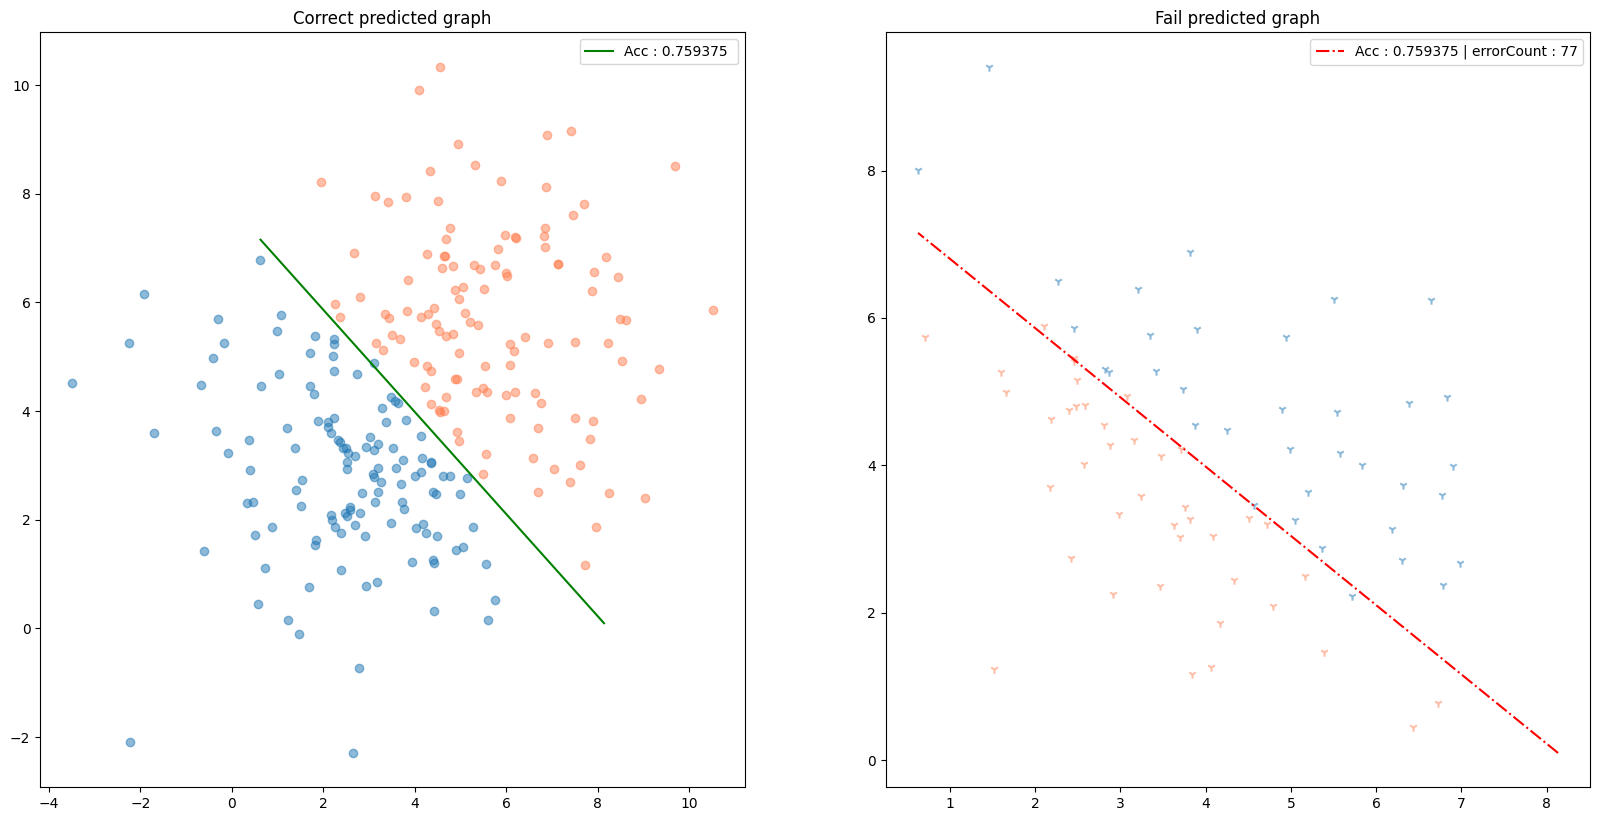

In [17]:
point_1, point_2 = boundary_points(X_train, theta_final)
y_hat = zo_predict(h(X_train_aug, theta_final))
print(point_1,'\n','---'*30, '\n',point_2)
plt.figure(figsize=(20,10),dpi = 100)
plot_x_y_color_bl(X_train,y_train,y_hat,point_1, point_2)

## Newton class


In [18]:
class Logistic_NM: 
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None

        s = 1 / (1 + np.exp(-1 *z))
        return s

    def h(self,X, theta):
        hf = None
        hf = self.sigmoid(X @ theta)

        return hf

    def gradient(self, X, y, y_pred):
        grad = None

        grad = -X.T @ (y - y_pred) / X.shape[0]

        return grad
        
    def hessian(self, X, y, theta):
        hess_mat = None

        y_pred = self.h(X, theta)
        hess_mat = X.T @ X *(y_pred.T @(1-y_pred))/X.shape[0]
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None

        y_pred = self.h(X, theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = sum(error) / X.shape[0]
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):

            cost,grad = self.costFunc(theta, X, y)
            theta = theta - (np.linalg.inv(self.hessian( X, y, theta)) @ grad )
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        y_train_pred_soft = self.h(X, theta)
        y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)
        labels = [i for i in y_train_pred_hard[:,0]]
        labels=np.asarray(labels)
        return labels


    def getAccuracy(self,X,y,theta):
        y_pred_soft = self.h(X, theta)
        y_pred_hard = (y_pred_soft > 0.5).astype(int)
        percent_correct = (y_pred_hard == y).astype(int).sum() / y.shape[0]
        return percent_correct*100


In [19]:
# #TOUSE
# NM_model = Logistic_NM()

# iterations = 1000

# nm_theta, nm_cost = NM_model.newtonsMethod('''TOADD''')
# print("theta:",nm_theta)

# print(nm_cost[0])
# plt.plot(nm_cost)
# plt.show()

## Background Of Binary Logis
The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$
That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:

----------------------------------------------------------------------------------------------------------------------------------------

### cost function
You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have


$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j^{th}$ iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

----------------------------------------------------------------------------------------------------------------------------------------


## Multinomial Logistic Regression

In [ ]:

class MultinomialLogisticRegression(object):
    
    def __init__(self, iteration = 5, alpha = 0.01):
        self.num_epochs = iteration
        self.alpha      = alpha
    
    def cross_entropy(self, y, yhat): #H = yhat = F(x)
        return -np.sum(y * np.log(yhat))
    
    def fit(self, X_train, oh_y_train):
        (m, n), k    = X_train.shape, oh_y_train.shape[1]
        self.theta   = np.ones((n, k))
        losses = []
        
        perm = np.random.permutation(X_train.shape[0])
        X_train    = X_train[perm]
        oh_y_train = oh_y_train[perm]
        
        for _ in range(self.num_epochs):
            #1. predict
            yhat = self._predict(X_train)
            
            loss = self.cross_entropy(oh_y_train, yhat) / m  #divided by m gonna make my loss smaller
            losses.append(loss)
            
            #2. grad
            grad = X_train.T @ (yhat - oh_y_train)
            
            #3. update
            self.theta = self.theta - self.alpha * grad
        
        return losses
    
    def _predict(self, X_train):
        input = X_train @ self.theta
        return np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)
    
    def predict(self, X_test):
        input = self._predict(X_test)
        return np.argmax(input, axis=1)


    

In [11]:
lr = MultinomialLogisticRegression()
train_losses = lr.fit(X_train, oh_y_train)
yhat = lr.predict(X_test)

#4.1 optional plotting
plt.plot(train_losses)
plt.xlabel("iterations")
plt.ylabel("losses")
plt.show()



NameError: name 'MultinomialLogisticRegression' is not defined

# Mul reg

## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$


We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$


Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


----------------------------------------------------------------------------------------------------------------------------------------

# Regression

> Gradient

In [36]:
%reset -f

In [43]:
import numpy as np
import matplotlib.pyplot as plt


In [96]:
h = lambda X,theta : X @ theta
gradient = lambda X, y, theta: X.T @ (X @ theta - y)

def cost(theta, X, y):
    dy = (X @ theta) - y
    return .5*(dy.T @ dy)



def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    if theta_initial == 0:
        theta_initial = np.zeros((X.shape[1],))
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - (alpha*grad)
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return theta, J_per_iter, gradient_per_iter

def goodness_of_fit(y, y_predicted):
    ybar = (sum(y)/y.shape[0])
    siGy_yhatsq =sum(np.power((y-y_predicted),2))
    siGy_ybsq =sum(np.power((y-ybar),2))
    r_square = 1-(siGy_yhatsq/siGy_ybsq)
    return r_square

In [97]:
mu1 = [3, 6]
Sigma = [[5, 0], [0, 4]]
testdatX1 = np.random.multivariate_normal(mu1, Sigma, 200)
y_testdat = np.random.uniform(low=0.0, high=200, size=(200))
testdatX1.shape,y_testdat.shape

((200, 2), (200,))

In [98]:
tst_use = add_intercept(testdatX1)

In [99]:
theta, J_per_iter, gradient_per_iter = gradient_descent(tst_use,y_testdat,0,0.0001,500)

In [100]:
y_hat = h(tst_use,theta)

In [101]:
goodness_of_fit(y_testdat, y_hat)

-0.04480090769499845

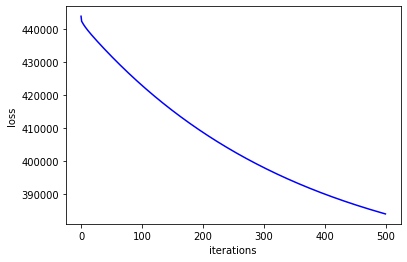

In [102]:
def cost_plot(iterations, costs):
 
    ran_iter = np.arange(0,iterations,1)
    plt.plot(ran_iter,costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()

cost_plot(500, J_per_iter)

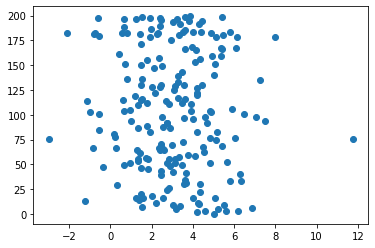

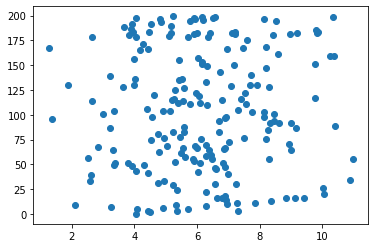

In [103]:
plt.scatter(tst_use[:,1],y_testdat)
plt.show()
plt.scatter(tst_use[:,2],y_testdat)

> normal eq


$\theta = (X^TX)^{-1}(X^Ty)$

In [104]:
def normal_equation(X,y):

    Xty = (X.T @ y)
    XtX = X.T @ X
    theta_n = np.linalg.inv(XtX) @Xty
    n = theta_n.shape[0]
    return theta_n

In [105]:
theta_n = normal_equation(tst_use,y_testdat)

In [106]:
theta_n.shape

(3,)

In [107]:
y_hat_n = h(tst_use,theta_n)

In [108]:
goodness_of_fit(y_testdat, y_hat_n)

0.004935180539668682

##### normalize from lab


In [109]:
def normalized_data(data)-> np.array:
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds

def reverse_normalized(data_std,data_org)-> np.array:
    means = np.mean(data_org, axis=0)
    stds = np.std(data_org, axis=0)
    return (stds * data_std) + means

### plot 3d

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [111]:
def plot_3D(theta,X,y,**kwag):
    fig = plt.figure(dpi = 150)
    ax = fig.add_subplot(projection='3d')
    p = ax.scatter(X[:,1],X[:,2],y,c=X[:,2],alpha=1)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    if kwag['title']:
        plt.title(kwag['title'])
    X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
    X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

    xx1,xx2 = np.meshgrid(X1,X2)

    yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
    ax.plot_surface(xx1,xx2,yy, alpha=0.5)
    ax.view_init(elev=25, azim=10)
    plt.colorbar(p)
    plt.show()

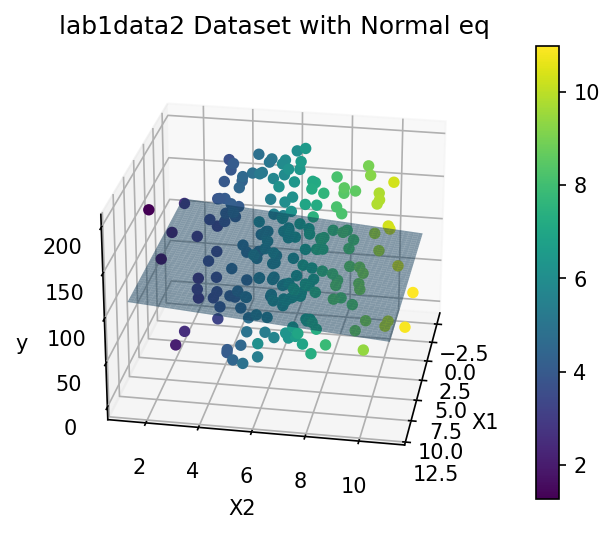

In [112]:
axes_label={}
axes_label['xla'] = 'X1'
axes_label['yla'] = 'X2'
axes_label['zla'] = 'y'
axes_label['title'] = 'lab1data2 Dataset with Normal eq'
plot_3D(theta_n,tst_use,y_testdat,**axes_label)

### batch gradient descent algorithm
$$\theta=\theta-\alpha\frac{1}{m} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)x^{(i)}_j$$
$$\theta = \theta - \alpha * \nabla_J(\mathbf{\theta})$$

Simultaneously update $\theta$ for all $j$


if output of $R^2$ less than 0, it means that $R^2$ is 0. None of the variation in the prediction is accounted for by the input values

$$\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}$$


In the standard setting, we assume that the dependent variable (the exam score) is a random variable that has a Gaussian distribution whose mean is a linear function of the independent variable(s) (the number of hours studied) and whose variance is unknown but constant:

\begin{equation}
y\sim\mathcal{N}(\theta_0+\theta_1x,\sigma^2)
\end{equation}

Our model or hypothesis, then, will be a function predicting $y$ based on $x$:
\begin{equation}
h_\theta(x)=\theta_0+\theta_1x
\end{equation}

Now we can conveniently write the hypothesis as

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

How can we find the best value of $\mathbf{\theta}$? We need a cost function and an algorithm to minimize that cost function.

$$\begin{align}
\ J(\mathbf{\theta}) & = \frac{1}{2} \sum_{i=1}^{m}\left(h_\mathbf{\theta}\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^2 \\
\                    & = \frac{1}{2} \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)^\top \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)
\end{align}$$
Here we've used $\mathtt{X}$ to denote the design matrix and $\mathbf{y}$ to denote the vector$$\begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} $$


###### Minimizing the cost function

Based on the previous example, we can see that to minimize our cost function, we just need to take the gradient with respect to $\mathbf{\theta}$ and determine where that gradient is equal to $\mathbf{0}$.

We have
$$ J(\mathbf{\theta}) = \frac{1}{2} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 .$$
This is a convex function of two variables ($\theta_0$ and $\theta_1$), so it has a single minimum where the gradient $\nabla_J(\mathbf{\theta})$ is $\mathbf{0}$.

/var/folders/6k/k4c4b7k97xg5ynmwn30pdxtr0000gn/T/ipykernel_46638/1288096420.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


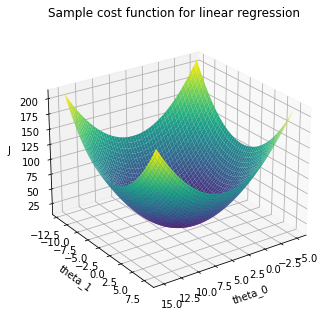

In [113]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5.0, 15.0, 100)
x2 = np.linspace(-12.0, 8.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')
ax.set_title('Sample cost function for linear regression')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

## Non Linear Regression

In [ ]:
def residual_error(y, y_pred):
    error = y - y_pred
    return error

def r_squared(y, y_pred):
    r_sqr = None
    distrib_predict = sum(np.square(y-y_pred))
    distrib_avg = sum(np.square(y-np.average(y)))
    r_sqr = 1-(distrib_predict/distrib_avg)
    return r_sqr

def get_predictions(x, theta):
    y_hat = x.dot(theta)  
    return y_hat

def get_mesh(X,y,num_linspace):
  x_series = np.linspace(min(X),max(X),num = num_linspace)
  y_series = np.linspace(min(y),max(y),num = num_linspace)
  x_mesh, y_mesh = np.meshgrid(x_series,y_series)
  return x_mesh, y_mesh

def normailized(data):
  return (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    theta = theta.reshape(-1,1)
    y = x@theta
    return y

def plot_3D(X,y,z,surf = False,zz=False,r = False,**kwag):
    fig = plt.figure(dpi = 150)
    ax = fig.add_subplot(projection='3d')
    p = ax.scatter(X,y,z,alpha=1,c = z)
    ax.set_xlabel(kwag['xlabel']) 
    ax.set_ylabel(kwag['ylabel']) 
    ax.set_zlabel(kwag['zlabel']) 
    if kwag['title']:
        plt.title(kwag['title'])
    if surf:
      if zz:
          p = ax.plot_surface(kwag['x_mesh'], kwag['y_mesh'],kwag['z_series'],alpha=0.5)
          ax.view_init(elev=20, azim=10)
          plt.colorbar(p)
      else:
          #TODO
          pass
    if r:
        return ax,plt
    else:
      plt.show()
    
def cost(theta,X,y):
    theta = theta.T
    dy = (y - h(X,theta))
    divider = 1/(2*y.shape[0])  
    return divider*sum(np.square(dy))

def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # _>2 shuffle >> idx
    random.shuffle(idx)
    # 3 split index
    split_point = int(percent_train*y.shape[0])
    # 4 >> sep tech
    X_train = X[idx[:split_point]]
    X_test = X[idx[split_point:]]
    y_train = y[idx[:split_point]]
    y_test = y[idx[split_point:]]  
    return idx, X_train, y_train, X_test, y_test

def h(X, theta):
    return X.dot(theta)

def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

def rmse(y, y_pred):
    error = None
    distributionofpredictedvalue = np.power((y - y_pred),2)
    
    error_power = sum(distributionofpredictedvalue)/y.shape[0]
    error = math.sqrt(error_power)
    return error

def get_predictions_lg(x, theta):
    # Change the shape of x to support the function    
    x = np.array([x]).T 
    d = theta.shape[0]
    xaug = np.insert(x,0, 1, axis=1)
    for i in range(d-2):
        xaug = np.append(xaug,np.power(x,i+2),axis=1)
    y_hat = xaug.dot(theta)
    
    return y_hat

def y_tranform_stdd(y,y_pre_norm):
    sigma = np.array(np.std(y))
    mu = np.array(np.mean(y))
    return np.round(y_pre_norm)*sigma + mu

def x_polynomial(x, n):
    X = None
    # YOUR CODE HERE
    
    X = np.insert(x,0, 1, axis=1)
    
    for i in range(n-1):
        X = np.append(X,np.power(x,i+2),axis=1)
    return X

### mesh plot

In [ ]:

num_linspace = 100
x_series, y_series = None, None
x_mesh, y_mesh, xy_mesh = None, None, None
X_csv = None
y_csv = None


x_series = np.linspace(X_csv[0,0],X_csv[-1,0],num = num_linspace)
y_series = np.linspace(X_csv[0,1],X_csv[11,1],num = num_linspace)
x_mesh, y_mesh = np.meshgrid(x_series,y_series)
xy_mesh = np.stack((x_mesh, y_mesh),2)


z_series = mesh_predictions(xy_mesh,theta).reshape((num_linspace,num_linspace))

In [ ]:
dic_plot = {}
dic_plot['xlabel'] = 'year'
dic_plot['ylabel'] = 'month'
dic_plot['zlabel'] = 'sale'
dic_plot['title'] = 'Massale'
dic_plot['z_series'] = z_series
dic_plot['x_mesh'] = x_mesh
dic_plot['y_mesh'] = y_mesh


ax, plt = plot_3D(X_csv[:,0],X_csv[:,1],y_csv,surf = True,zz=True,r = True, **dic_plot)
plt.show()

In [ ]:
data_csv = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)
y_label = 'sale amount';
y_index = np.where(headers == y_label)[0][0];
y = data_csv[:,y_index];                      
X = data_csv[:,0:y_index];                 
m = data_norm.shape[0]

percent_train = .6
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_csv[train_idx, 0:y_index];
X_test = data_csv[test_idx, 0:y_index];
y_train = data_csv[train_idx, y_index];
y_test = data_csv[test_idx, y_index];

#=============================

# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    print("3D plot: Polynomial degree 2","\n")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)
    x_year = data_csv[:, 0]
    y_month = data_csv[:, 1]
    z_sale = data_csv[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x_year,y_month, z_sale,edgecolors='black', c=data_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('Year')
    ax.set_ylabel('Month')
    ax.set_zlabel('Sale')

    # plot observation
    x_series = np.linspace(min(data_csv[:,0]), max(data_csv[:,0]),len(y_csv))
    y_series = np.linspace(min(data_csv[:,1]), max(data_csv[:,1]),len(y_csv))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)

    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

In [ ]:
x_mesh, y_mesh = get_mesh(X =Xni2_train[:,1] ,y = Xni2_train[:,2],num_linspace=yn_train.shape[0])
z_series = (theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*x_mesh)+theta[4]*(y_mesh* y_mesh))




dic_plot = {}
dic_plot['xlabel'] = 'year'
dic_plot['ylabel'] = 'month'
dic_plot['zlabel'] = 'sale'
dic_plot['title'] = 'polynomial regression graph with d = 2'
dic_plot['z_series'] = z_series
dic_plot['x_mesh'] = x_mesh
dic_plot['y_mesh'] = y_mesh


ax, pltd2 = plot_3D(Xni2_train[:,1],Xni2_train[:,2],yn_train,surf = True,zz=True,r = True, **dic_plot)
pltd2.show()

### residue

In [ ]:
plt.hist(residual_error(yn_test,y_pred_test_d1), bins=10, label = 'Linear')
plt.hist(residual_error(yn_test,y_pred_test_d2), bins=10, label = 'Polynomial with d = 2',alpha = 0.7)
plt.hist(residual_error(yn_test,y_pred_test_d3), bins=10, label = 'Polynomial with d = 3',alpha = 0.5)

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()
plt.show()

In [ ]:
max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Nonlinear Regression and Overfitting

In Lab 01, we explored the construction of linear regression models. Recall the assumptions we make in linear regression:
- $\textbf{x} \in {\cal X} = \mathbb{R}^n$
- $y \in {\cal Y} = \mathbb{R}$
- The $\textbf{x}$ data are drawn i.i.d. from some (unknown) distribution over ${\cal X}$
- There is a linear relationship between $\textbf{x}$ and $y$ with additive constant-variance Gaussian noise, i.e., $y \sim {\cal N}(\theta^\top \textbf{x}, \sigma^2)$,
  where $\theta \in \mathbb{R}^{n+1}$ is unknown and $\textbf{x}$ is an $n+1$-dimensional vector augemented with a constant value of 1 as its first element.

Today, we consider what we might do when the fourth assumption, linearity, does not hold. We introduce a particular form of nonlinear regression,
*polynomial regression*, in which we account for nonlinear relationships between $\mathbf{x}$ and $y$ by performing nonlinear transformations of
the input variables in $\mathbf{x}$.

As an example, if we had a single input variable $x$, linear regression gives us the hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x .$$
We can add a new "variable" $x^2$, which is a nonlinear transformation of the input $x$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 .$$
The important thing to notice here is that although the hypothesis is *nonlinear* in $x$, allowing us to model a more complex function than
ordinary linear regression, the hypothesis is *linear* in $\theta$, allowing us to use the normal equations to find the optimal $\theta$ as before.

## Polynomial Regression

More generally, polynomial regession is a form of linear regression in which the relationship between the independent variables $\mathbf{x}$ and the dependent
variable $y$ is modelled as a polynomial.

For a single input $x$, the hypothesis in a polynomial regression of degree $d$ is
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i$$

For a multivariate input $\mathbf{x}$, we introduce terms corresponding to every degree-$d$

combination of factors. For example, if $n=3$ and $d=2$, we have
$$h_\theta(\mathbf{x}) = \theta_0
                       + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
                       + \theta_4 x_1^2 + \theta_5 x_1 x_2 + \theta_6 x_1 x_3
                       + \theta_7 x_2^2 + \theta_8 x_2 x_3 + \theta_9 x_3^2 .$$



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Lab 06: Generative classifiers: Naive Bayes

As discussed in class, a Naive Bayes classifier works as follows:
$$\begin{eqnarray}
p(y \mid \mathbf{x} ; \theta) & = & \frac{p(\mathbf{x} \mid y ; \theta) p(y ; \theta)}{p(\mathbf{x} ; \theta)} \\
& \propto & p(\mathbf{x} \mid y ; \theta) p(y ; \theta) \\
& \approx & p(y ; \theta) \prod_j p(x_j \mid y ; \theta)
\end{eqnarray}$$
We will use Naive Bayes to perform diabetes diagnosis and text classification.

In [1]:
# Load data from CSV file
def loadCsv(filename):
    data_raw = pd.read_csv(filename)
    headers = data_raw.columns
    dataset = data_raw.values
    return dataset, headers

# Split dataset into test and train with given ratio
def splitDataset(test_size,*arrays,**kwargs):
    return train_test_split(*arrays,test_size=test_size,**kwargs)

# Separate training data according to target class
# Return key value pairs array in which keys are possible target variable values
# and values are the data records.

def data_split_byClass(dataset):
    Xy = {}
    for i in range(len(dataset)):
        datapair = dataset[i]
        # datapair[-1] (the last column) is the target class for this record.
        # Check if we already have this value as a key in the return array
        if (datapair[-1] not in Xy):
            # Add class as key
            Xy[datapair[-1]] = []
        # Append this record to array of records for this class key
        Xy[datapair[-1]].append(datapair)
    return Xy
    

In [2]:
# Parameters of a Gaussian are its mean and standard deviation

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

# Calculate Gaussian parameters mu and sigma for each attribute over a dataset

def get_gaussian_parameters(X,y):
    parameters = {}
    unique_y = np.unique(y)
    for uy in unique_y:
        mean = np.mean(X[y==uy],axis=0)
        std = np.std(X[y==uy],axis=0)
        py = y[y==uy].size/y.size
        parameters[uy] = {'prior':py,'mean':mean,'std':std}
    return parameters, unique_y

def calculateProbability(x, mu, sigma):
    sigma = np.diag(sigma**2)
    x = x.reshape(-1,1)
    mu = mu.reshape(-1,1)
    exponent = np.exp(-1/2*(x-mu).T@np.linalg.inv(sigma)@(x-mu))
    return ((1/(np.sqrt(((2*np.pi)**x.size)*np.linalg.det(sigma))))*exponent)[0,0]

In [3]:
# Calculate class conditional probabilities for given input data vector

def predict_one(x,parameters,unique_y,prior = True):
    probabilities = []
    for key in parameters.keys():
        probabilities.append(calculateProbability(x,parameters[key]['mean'],parameters[key]['std'])*(parameters[key]['prior']**(float(prior))))
    probabilities = np.array(probabilities)
    return unique_y[np.argmax(probabilities)]

def getPredictions(X, parameters, unique_y,prior=True):
    predictions = []
    for i in range(X.shape[0]):
        predictions.append(predict_one(X[i],parameters,unique_y,prior))
    return np.array(predictions)

# Get accuracy for test set

def getAccuracy(y, y_pred):
    correct = len(y[y==y_pred])
    return correct/y.size

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# nave bay 2

In [9]:
class GNB(object):
    def __innit__():
        pass
    def mean_std(self,X,y):
        n = X.shape[1]
        mean = np.zeros((self.k,n))
        std = np.zeros((self.k,n))
        # for en in range(n):
        for ek in range(self.k):
            mean[ek,:] = ((X[y == ek]).mean(axis = 0))
            std[ek,:] = ((X[y == ek]).std(axis = 0))
        return mean,std

    def fit(self,X_train,y_train):
        self.k = len(set(y_train))
        # print(self.k)
        assert self.k == 2 , f'not support k = {self.k}'
        # self.prior0 = len(y_train[y_train == 0])/y_train.shape[0]
        # self.prior1 = len(y_train[y_train == 1])/y_train.shape[0]
        self.prior(y_train)
        self.mean,self.std = self.mean_std(X_train,y_train)
    
    def gaussian_pdf(self,X_test, mean, std):
        left = 1/(np.sqrt(2*np.pi)*std)
        power = (X_test - mean)**2/(2*std**2)
        return left * np.exp(-power)
    
    def prior(self,y_train):
        self.prior0 = len(y_train[y_train == 0])/y_train.shape[0]
        self.prior1 = len(y_train[y_train == 1])/y_train.shape[0]

    def predict(self,X_test):
        pef0 = self.gaussian_pdf(X_test,self.mean[0,:],self.std[0,:])
        pef1 = self.gaussian_pdf(X_test,self.mean[1,:],self.std[1,:])
        total_likeli0 = np.prod(pef0,axis = 1)
        total_likeli1 = np.prod(pef1,axis = 1)  
        return (total_likeli1 * self.prior1 > total_likeli0 * self.prior0).astype(int)

In [10]:
gnb = GNB()
gnb.fit(X_train,y_train)
y_hat = gnb.predict(X_test)
print(f' Percentage accuracy/100 = {(y_hat == y_test).sum() /y_test.shape[0]}')

NameError: name 'X_train' is not defined

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## SVM

## Generalized Lagrangian optimization for SMVs

Now we consider the generalized Lagrangian for the SVM. This technique is suitable for solving problems of the form
  $$ \begin{array}{rl}
    \min_{\mathbf{w}} & f(\mathbf{w}) \\
    \text{subject to} & g_i(\mathbf{w}) \le 0, i \in 1..k \\
                      & h_i(\mathbf{w}) = 0, i \in 1..l
   \end{array}$$

The generalized Lagrangian is
$$\cal{L}(\mathbf{w},\mathbf{\alpha},\mathbf{\beta}) = f(\mathbf{w}) + \sum_{i=1}^k \alpha_i g_i(\mathbf{w}) + \sum_{i=1}^l \beta_i h_i(\mathbf{w}),$$
which has been cleverly arranged to be equal to $f(\mathbf{w})$ whenever $\mathbf{w}$ satisfies the constraints and $\infty$ otherwise.

### Primal and dual Lagrangian problems

The primal problem is to find
$$p^* = \min_{\mathbf{w}}\theta_{\cal P}(\mathbf{w}) = \min_\mathbf{w}\max_{\mathbf{\alpha},\mathbf{\beta},\alpha_i \ge 0} {\cal L}(\mathbf{w},\mathbf{\alpha},\mathbf{\beta})$$
and the dual problem is to find
$$d^* = \max_{\mathbf{\alpha},\mathbf{\beta},\alpha_i \ge 0} \theta_{\cal D}(\mathbf{\alpha},\mathbf{\beta}) =  \max_{\mathbf{\alpha},\mathbf{\beta},\alpha_i \ge 0} \min_\mathbf{w}{\cal L}(\mathbf{w},\mathbf{\alpha},\mathbf{\beta}).$$
If $f$ is convex, the $g_i$'s are affine, the $h_i$'s are convex, and the $g_i$'s are strictly
feasible, it turns out that the solutions to the primal and dual problem are the same, and the KKT conditions hold:
$$ \begin{array}{rcl}
  \frac{\partial}{\partial w_i}{\cal L}(\mathbf{w}^*,\mathbf{\alpha}^*,\mathbf{\beta}^*) & = & 0, i \in 1..n \\
  \frac{\partial}{\partial \beta_i}{\cal L}(\mathbf{w}^*,\mathbf{\alpha}^*,\mathbf{\beta}^*) & = & 0, i \in 1..l \\
  \alpha_i^*g_i(\mathbf{w}^*) & = & 0, i \in 1..k \\
  g_i(\mathbf{w}^*) & \le & 0, i \in 1..k \\
  \alpha_i^* & \ge & 0, i \in 1..k
  \end{array} $$

### Solving the dual Lagrangian problem

The dual problem turns out to be easiest to solve.

We first solve for $\mathbf{w}$ assuming fixed $\mathbf{\alpha}$ and $\mathbf{\beta}$ (we don't have equality constraints though, so no need for $\mathbf{\beta}$).

We need to rewrite the SVM constraints in the necessary form with $g_i(\mathbf{w})=0$.obtain, for the SVM, constraints
$$g_i(\mathbf{w},b) = -y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)} + b) + 1 \ge 0.$$
Using that definition of $g_i(\mathbf{w},b)$, we obtain the Lagrangian
$${\cal L}(\mathbf{w},b,\mathbf{\alpha}) = \frac{1}{2}\|\mathbf{w}\|^2 - \sum_{i=1}^m\alpha_i\left[ y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)} + b) -1 \right] $$
Taking the gradient of ${\cal L}$ with respect to $\mathbf{w}$ and setting it to 0, we obtain

$$\nabla_\mathbf{w}{\cal L}(\mathbf{w},b,\mathbf{\alpha}) = \mathbf{w} - \sum_{i=1}^m\alpha_i y^{(i)} \mathbf{x}^{(i)} = 0,$$
which gives us

$$\mathbf{w}=\sum_{i=1}^m\alpha_i y^{(i)} \mathbf{x}^{(i)}.$$

From $\frac{\partial {\cal L}}{\partial b} = 0$, we obtain
$$\sum_{i=1}^m \alpha_i y^{(i)} = 0,$$
which is interesting (think about what it means also considering that $\alpha_i > 0$ only for examples on the margin.
Unfortunately it doesn't help us find $b$! In any case, we plug this definition for the optimal $\mathbf{w}$ into the original Lagrangian,
to obtain
$${\cal L}(\mathbf{w},b,\mathbf{\alpha}) = \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i,j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j (\mathbf{x}^{(i)})^\top\mathbf{x}^{(j)} - b\sum_{i=1}^m \alpha_i y^{(i)}. $$
We already know that the last term is 0, so we get
$${\cal L}(\mathbf{w},b,\mathbf{\alpha}) = \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i,j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \left< \mathbf{x}^{(i)},\mathbf{x}^{(j)} \right> . $$
OK! We've eliminated $\mathbf{w}$ and $b$ from the optimization. Now we just need to maximize ${\cal L}$ with respect to $\mathbf{\alpha}$.
This gives us the final (dual) optimization problem
$$ \begin{array}{rl}
  \max_{\mathbf{\alpha}} & W(\mathbf{\alpha}) = \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i,j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j \left< \mathbf{x}^{(i)}, \mathbf{x}^{(j)} \right> \\
  \text{such that} & \alpha_i \ge 0, i \in 1..m \\
                   & \sum_{i=1}^m \alpha_i y^{(i)} = 0
\end{array} $$
This turns out to be QP again!

Aside: once we solve for $\mathbf{\alpha}$, we obtain $\mathbf{w}$ according to the equation above, then it turns out that the optimal $b$ can be obtained as in
the lecture notes.

### QP solution to dual problem

We need to negate our objective function to turn the max (SVM formulation) into a min (QP formalation).

For the second term of $W(\mathbf{\alpha})$, first let $\mathtt{K}$ be the kernel matrix with $\mathtt{K}_{ij} = \left< \mathbf{x}^{(i)}, \mathbf{x}^{(j)} \right>$. Then $\mathbf{\alpha}^\top \text{diag}(\mathbf{y}) \mathtt{K} \text{diag}(\mathbf{y}) \mathbf{\alpha}$ gives us the summation in the second term ($\text{diag}(\mathbf{y})$ is just the square diagonal matrix with $\mathbf{y}$ as its diagonal).

The (negated) first term of $W(\mathbf{\alpha})$ can be written in QP form with $\mathbf{c} = \begin{bmatrix} -1 & -1 & \ldots \end{bmatrix}^\top$.

So that gives us our QP setup:
$$ \mathtt{Q} = \text{diag}(\mathbf{y}) \mathtt{K} \text{diag}(\mathbf{y}) \; \; \;
   \mathbf{c} = \begin{bmatrix} -1 \\ -1 \\ \vdots \end{bmatrix} $$

$$\mathtt{A} = -\mathtt{I}_{m\times m} \;\;\;
  \mathbf{b} = \begin{bmatrix} 0 \\ 0 \\ \vdots \end{bmatrix} $$

$$\mathtt{E} = \mathbf{y}^\top \;\;\;
  \mathbf{d} = \begin{bmatrix} 0 \end{bmatrix}. $$

OK, now the code:

In [5]:
import numpy as np
import cvxopt

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

In [6]:
import matplotlib.pyplot as plt



def plot_mf(Xf,Xm):
    axes = plt.axes()
    females_series = plt.scatter(np.array(Xf[:,0]), np.array(Xf[:,1]), s=30, c='b', marker='o', label='Females')
    males_series = plt.scatter(np.array(Xm[:,0]), np.array(Xm[:,1]), s=30, c='y', marker='o', label='Males')
    axes.set_aspect('equal', 'datalim')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title('Height-weight data for males and females (fake data!)')
    plt.legend(handles=[females_series, males_series], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return axes


def plot_w(w, b, axes):
    ylim = axes.get_ylim()
    xlim = axes.get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')



Cvxopt solution:
     pcost       dcost       gap    pres   dres
 0: -3.2822e+00 -9.6005e+00  6e+00  5e-17  9e-01
 1: -6.9907e+00 -8.3734e+00  1e+00  5e-17  3e-01
 2: -1.0434e+01 -1.1566e+01  1e+00  3e-16  1e-16
 3: -1.0492e+01 -1.0506e+01  1e-02  2e-16  2e-16
 4: -1.0495e+01 -1.0495e+01  1e-04  4e-16  1e-16
 5: -1.0495e+01 -1.0495e+01  1e-06  9e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4721e-03  6.5053e+00  5e+01  2e+00  4e+02
 1:  1.0012e-02 -4.7161e+00  1e+01  6e-01  1e+02
 2:  2.6180e-02 -4.8172e+00  7e+00  2e-01  6e+01
 3:  3.9767e-02 -4.5363e-01  5e-01  1e-02  2e+00
 4:  3.5404e-02  1.8200e-02  2e-02  5e-15  1e-13
 5:  3.1392e-02  3.0877e-02  5e-04  2e-15  2e-12
 6:  3.1250e-02  3.1245e-02  5e-06  2e-15  7e-14
 7:  3.1249e-02  3.1248e-02  5e-08  4e-15  7e-14
Optimal solution found.
Optimal w: [0.640061 0.768324] b: -153.309495


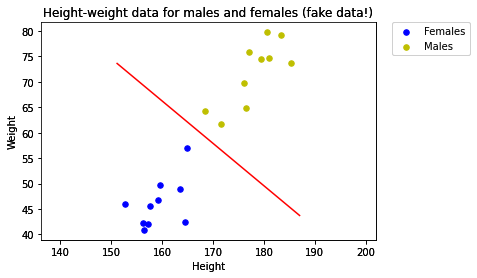

In [7]:
M = np.array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
Q = M.T @ M
c = (np.array([3., 2., 3.]) @ M).reshape((3,))
A = np.array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
b = np.array([3., 2., -2.]).reshape((3,))

print("Cvxopt solution:")
cvxopt_solve_qp(Q, c, A, b)

Xf = np.matrix([[ 164.939, 163.431, 157.554, 152.785, 156.385, 159.242, 156.281, 164.411, 157.308, 159.579 ],
                [  56.927,  48.945,  45.678,  45.969,  40.896,  46.848,  42.225,  42.380,  42.150,  49.739 ]]).T;
Xm = np.matrix([[ 168.524, 171.597, 179.469, 176.063, 180.939, 177.011, 183.284, 180.549, 176.502, 185.392 ],
                [  64.353,  61.793,  74.552,  69.851,  74.730,  75.871,  79.170,  79.753,  64.923,  73.665 ]]).T;
X = np.concatenate([Xf, Xm],0);
y = np.concatenate([-np.matrix(np.ones([10,1])),np.matrix(np.ones([10,1]))]);

axes = plot_mf(Xf,Xm)

Q = np.eye(3);
Q[2,2] = 0;
c = np.zeros([3])
A = np.multiply(np.tile(-y,[1, 3]), np.concatenate([X, np.ones([20,1])],1))
b = -np.ones([20])
x = cvxopt_solve_qp(Q, c, A, b);
w = np.matrix([[x[0]],[x[1]]]);
b = x[2];
scale = np.linalg.norm(w);
w = w / scale;
b = b / scale;
print('Optimal w: [%f %f] b: %f' % (w[0,0],w[1,0],b));

axes = plot_mf(Xf, Xm)
plot_w(w, b, axes)

Q rank: 2
     pcost       dcost       gap    pres   dres
 0: -2.7646e+00 -4.9725e+00  5e+01  6e+00  2e+00
 1: -6.4101e+00 -3.8299e+00  1e+01  2e+00  6e-01
 2: -5.0055e+00 -1.2719e+00  7e+00  8e-01  2e-01
 3: -5.1552e-02 -4.0648e-02  5e-01  3e-02  1e-02
 4: -1.8200e-02 -3.5404e-02  2e-02  7e-18  2e-13
 5: -3.0877e-02 -3.1392e-02  5e-04  5e-18  2e-13
 6: -3.1245e-02 -3.1250e-02  5e-06  7e-18  2e-13
 7: -3.1248e-02 -3.1249e-02  5e-08  6e-18  2e-13
Optimal solution found.
Optimal alpha:
[3.12484796e-02 1.13821985e-09 7.68004003e-10 6.22346942e-10
 6.43114906e-10 8.93974185e-10 6.60695981e-10 4.31409827e-10
 6.68557407e-10 1.19689394e-09 1.56332821e-02 1.56151999e-02
 5.00606721e-10 6.71834910e-10 4.89168003e-10 4.93113729e-10
 4.90935291e-10 4.85894510e-10 9.54348935e-10 4.42078646e-10]
Optimal w: [0.640062,0.768324] b: -153.309583


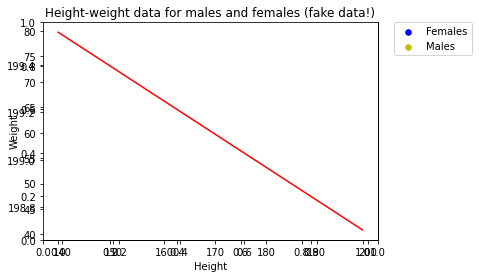

In [8]:
m = X.shape[0];
n = X.shape[1];

# Transform data set so that each attribute has a
# mean of 0 and a standard deviation of 1

def preprocess(X):
    means = X.mean(0);
    scales = 1/np.std(X,0);
    Xh = np.concatenate([X.T,np.ones([1,20])],0);
    Tm = np.matrix(np.eye(3));
    Tm[0:2,2:3] = -X.mean(0).T;
    Ts = np.matrix(np.eye(3));
    Ts[0:2,0:2] = np.diagflat(scales);
    T = Ts*Tm;
    XX = (T * Xh);
    XX = XX[0:2,:].T;
    return XX, T;

# RBF/Gaussian kernel

def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]) * (X[i,:] - X[j,:]).T
    K = np.exp(-K/(2*sigma*sigma))      
    return K;

def linear_kernel(X):
    m = X.shape[0];
    K = np.matrix(np.zeros([m,m]));
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = X[i,:]*(X[j,:].T)
    return K;

# Linear kernel below. We might also try
# XX, T = preprocess(X)
# K = gauss_kernel(XX)

K = linear_kernel(X);

Q = np.multiply(y * y.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m]);
A = -np.eye(m);
b = np.zeros([m]);
E = y.T;
d = np.zeros(1);
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d);
print("Optimal alpha:")
print(alpha_star)

def get_wb(X, y, alpha):
    # Find the support vectors
    S = alpha > 1e-6
    XS = X[S,:]
    yS = y[S]
    alphaS = alpha[S]
    alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
    w = sum(np.multiply(alphaSyS, XS)).T
    # Find b
    KS = K[S,:][:,S]
    NS = yS.shape[0]
    b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
    # Normalize w,b
    scalef = np.linalg.norm(w)
    w = w / scalef
    b = b / scalef
    return w,b

w,b = get_wb(X, y, alpha_star)

print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
plot_mf(Xf,Xm)

def plot_w(w,b):
    ylim = plt.axes().get_ylim()
    xlim = plt.axes().get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')

plot_w(w,b)